# Credit Risk Analysis Model

Name: Ferry Marcellus Suhendra


### Libraries
all libraries used in this notebook will be listed below.

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats as stats
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

### Data Loading

In [2]:
df1=pd.read_csv('IndonesiaCreditData.csv',sep=';')
df1

,No,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,14494431,6,radio/TV
1,1,22,female,2,own,little,moderate,73786449,48,radio/TV
2,2,49,male,1,own,little,NaN,25988304,12,education
3,3,45,male,2,free,little,little,97728918,42,furniture/equipment
4,4,53,male,2,free,little,little,60383130,24,car
...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,21524664,12,furniture/equipment
996,996,40,male,3,own,little,little,47822943,30,car
997,997,38,male,2,own,little,NaN,9968796,12,radio/TV
998,998,23,male,2,free,little,little,22876155,45,radio/TV


In [3]:
#Checking for missing values
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   No                1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


There are a large ammount of missing values in the saving accounts and checking account columns.

In [4]:
#inputing null values with none
df1.fillna('None',inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   No                1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   1000 non-null   object
 6   Checking account  1000 non-null   object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


In [5]:
# checking numeric data values
df1.describe()

,No,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000
mean,499.500000,35.546000,1.904000,4.056033e+07,20.903000
std,288.819436,11.375469,0.653614,3.499911e+07,12.058814
min,0.000000,19.000000,0.000000,3.099750e+06,4.000000
25%,249.750000,27.000000,2.000000,1.693083e+07,12.000000
50%,499.500000,33.000000,2.000000,2.875948e+07,18.000000
75%,749.250000,42.000000,2.000000,4.925193e+07,24.000000
max,999.000000,75.000000,3.000000,2.284392e+08,72.000000


### Exploratory data analysis

In [6]:
df1

,No,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,None,little,14494431,6,radio/TV
1,1,22,female,2,own,little,moderate,73786449,48,radio/TV
2,2,49,male,1,own,little,None,25988304,12,education
3,3,45,male,2,free,little,little,97728918,42,furniture/equipment
4,4,53,male,2,free,little,little,60383130,24,car
...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,None,21524664,12,furniture/equipment
996,996,40,male,3,own,little,little,47822943,30,car
997,997,38,male,2,own,little,None,9968796,12,radio/TV
998,998,23,male,2,free,little,little,22876155,45,radio/TV


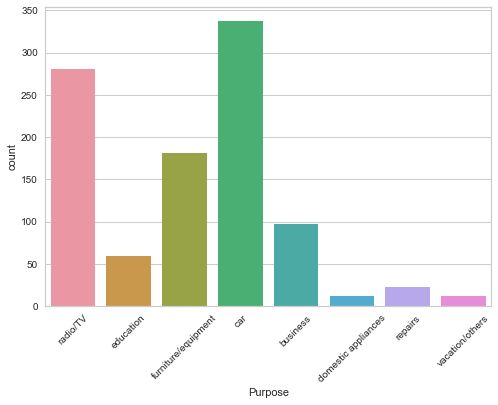

In [7]:
# Checking count of credit purpose
plt.figure()
sns.countplot(x='Purpose',data=df1)
plt.xticks(rotation=45)
plt.show()

based of the graph most credit card usage are for car payment.

In [8]:
# defining statistical test function
def chi2(x,y):
    ct=pd.crosstab(x,y)
    stat, p, dof, expected = stats.chi2_contingency(ct)
    print(ct)
    print('p=%.12f' %(p))
    if p > 0.05:
        print('Probably independent')
    else:
        print('Probably dependent')

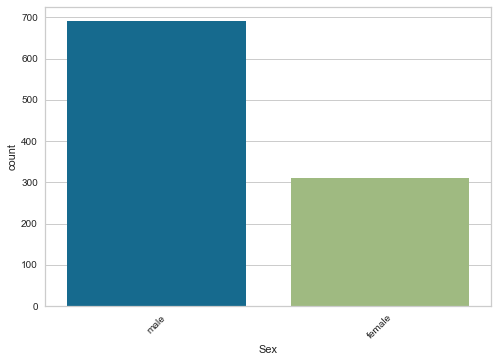

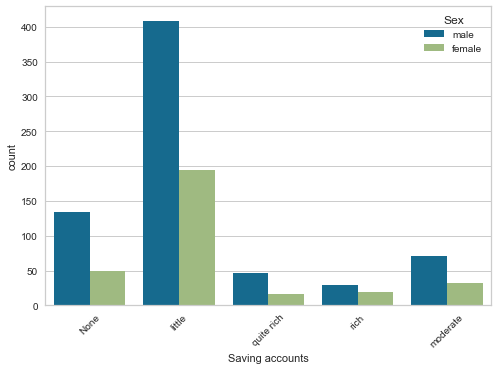

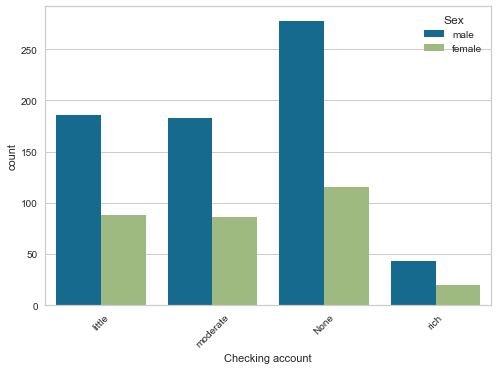

Sex              female  male
Saving accounts              
None                 49   134
little              194   409
moderate             32    71
quite rich           16    47
rich                 19    29
p=0.343471323024
Probably independent
--------------------
Sex               female  male
Checking account              
None                 116   278
little                88   186
moderate              86   183
rich                  20    43
p=0.863311892165
Probably independent


In [9]:
# Checking gender count
plt.figure()
sns.countplot(x='Sex',data=df1)
plt.xticks(rotation=45)
plt.show()

#plotting saving accounts by gender
plt.figure()
sns.countplot(x='Saving accounts',data=df1, hue='Sex')
plt.xticks(rotation=45)
plt.show()

# plotting checking account by gender
plt.figure()
sns.countplot(x='Checking account',data=df1, hue='Sex')
plt.xticks(rotation=45)
plt.show()

# Checking statistical correlation
chi2(df1['Saving accounts'],df1['Sex'])
print('-'*20)
chi2(df1['Checking account'],df1['Sex'])

In the dataset there is an imbalance with the count of male and female users.
the data shows that gender statistically have no correlation with saving accounts and checking account size.

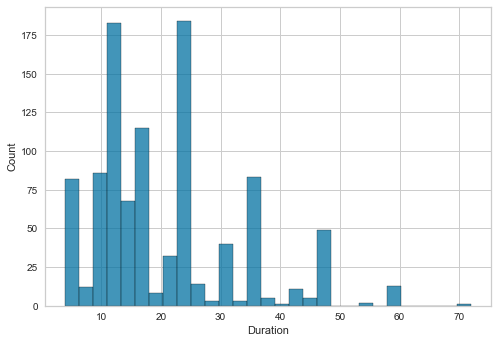

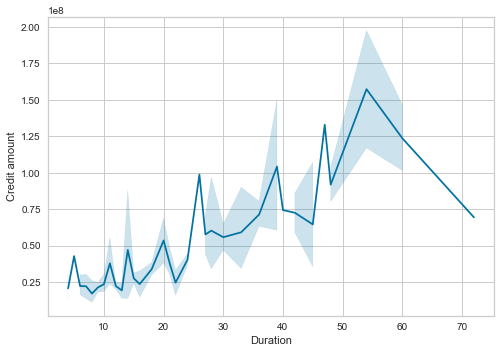

In [10]:
plt.figure()
sns.histplot(x='Duration',data=df1)
plt.show()

plt.figure()
sns.lineplot(y='Credit amount',x='Duration',data=df1)
plt.show()

figure shows that the highest credit ammount comes from users with longer membership duration.

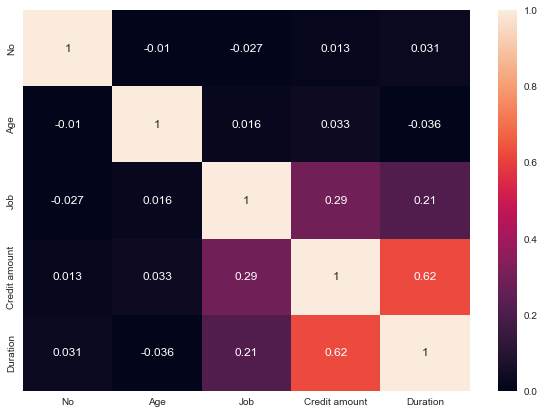

In [11]:
#Heat mapping correlations between numeric columns
plt.figure(figsize=(10, 7))
sns.heatmap(df1.corr(), annot= True, vmin=0, vmax=1)
plt.show()

### Data Preprocessing
for this modeling, columns that have no direct impact on user credit risk will not be included to simplify the model. these columns will be excluded from the modeling.

In [12]:
# change all object column into categories
obj_columns = df1.columns[df1.dtypes == "object"].tolist()
for obj in obj_columns:
    df1[obj] = df1[obj].astype("category")

In [13]:
# excluding columns
df1x=df1.drop(['No','Sex','Duration','Age'],axis=1)

# separating numerical and categorial features
num_columns = df1x.select_dtypes(include=np.number).columns.tolist() 
cat_columns = df1x.select_dtypes(include=['category']).columns.tolist()

print('Numerical Columns   : ', num_columns)
print('Categorical Columns : ', cat_columns)

x1_num = df1x[num_columns]
x1_cat = df1x[cat_columns]


Numerical Columns   :  ['Job', 'Credit amount']
Categorical Columns :  ['Housing', 'Saving accounts', 'Checking account', 'Purpose']


In [14]:
# encoding categorical features
x1_cat_encoded = x1_cat
for col in cat_columns:
    ohe = pd.get_dummies(x1_cat[col], prefix=col)
    x1_cat_encoded = pd.concat((x1_cat_encoded, ohe), axis=1).drop(col, axis=1)

x1_cat_encoded

,Housing_free,Housing_own,Housing_rent,Saving accounts_None,Saving accounts_little,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_None,Checking account_little,Checking account_moderate,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
996,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
997,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
998,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [15]:
# defining plot function
def plot_dist(df, col):
    fig, axes = plt.subplots(ncols = 2, figsize = (15, 5))
    
    # histogram
    sns.histplot(df[col],ax = axes[0], bins=30)
    axes[0].set_title(f"Histogram '{col}'")
    axes[0].axvline(df[col].mean(), color = 'red', linestyle = 'dashed', label = 'mean')
    axes[0].axvline(df[col].median(), color = 'green', linestyle = 'dashed', label = 'median')
    axes[0].legend()
    
    # boxplot
    sns.boxplot(y=df[col], ax =  axes[1])
    axes[1].set_title(f"Boxplot '{col}'")
    
    plt.show()
    
    # skewness
    print(df[col].name + ' Kurtosis: ' + str(df[col].kurt()))
    print(df[col].name + ' Skewness: ' + str(df[col].skew()))
    if -0.5 <= df[col].skew() <= 0.5:
        print("Columns '{}' normal distribution".format(col))
    elif df[col].skew() > 0.5:
        print("Columns '{}' right skewed".format(col))
    elif df[col].skew() < -0.5:
        print("Columns '{}' left skewed".format(col))

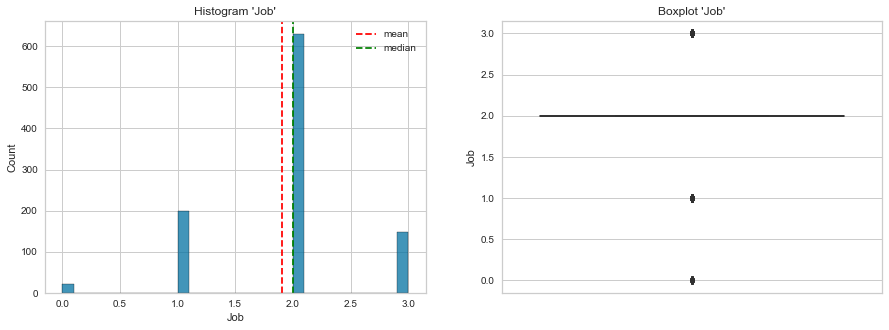

Job Kurtosis: 0.5018909846797865
Job Skewness: -0.3742948595135131
Columns 'Job' normal distribution


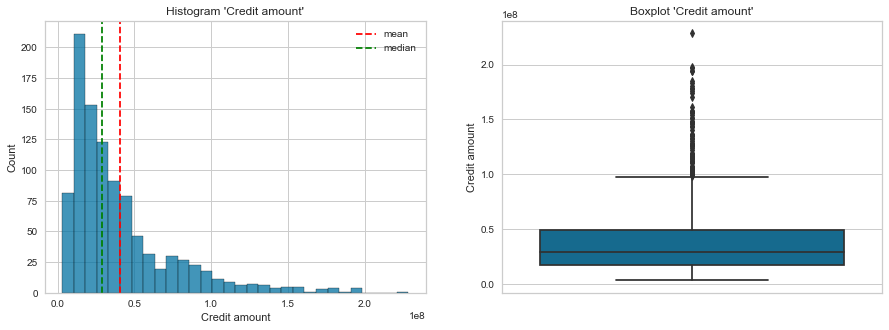

Credit amount Kurtosis: 4.292590308048505
Credit amount Skewness: 1.9496276798326202
Columns 'Credit amount' right skewed


In [16]:
# checking for data skewness and outlier
for col in num_columns:
    plot_dist(x1_num,col)

In [17]:
# scaling the data
scaler=MinMaxScaler()
x1_num_scaled=scaler.fit_transform(dfttw)
x1_num_scaled=pd.DataFrame(x1_num_scaled, columns=num_columns)
x1_num_scaled

NameError: name 'dfttw' is not defined

In [ ]:
# joining categorical and numerical values
x1_final = np.concatenate([x1_num_scaled, x1_cat_encoded], axis=1)

# Converting array into dataframe
cat_columns_final = x1_cat_encoded.columns.tolist()
x1_final_df = pd.DataFrame(x1_final, columns=[num_columns+cat_columns_final])
x1_final_df 

,Job,Credit amount,Housing_free,Housing_own,Housing_rent,Saving accounts_None,Saving accounts_little,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,...,Checking account_moderate,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,0.666667,0.120408,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.666667,0.746950,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.333333,0.241864,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.666667,0.999951,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.666667,0.605316,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.333333,0.194697,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
996,1.000000,0.472592,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.666667,0.072586,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
998,0.666667,0.208978,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Due to the large ammount of columns after encoding the categorical data. PCA will be applied to reduce dimensionality

In [ ]:
# reducing dimentionality with PCA
pca=PCA(n_components=22)
pca.fit(x1_final_df)

PCA(n_components=22)

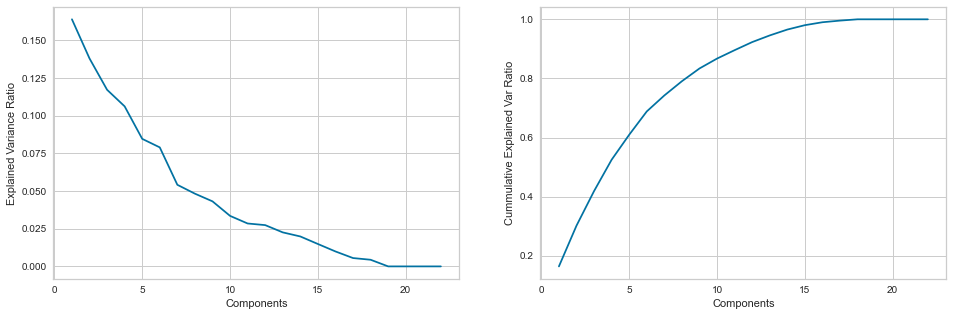

In [ ]:
fig,ax=plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,23),pca.explained_variance_ratio_)
ax[0].set_xlabel('Components')
ax[0].set_ylabel('Explained Variance Ratio')

ax[1].plot(range(1,23),np.cumsum(pca.explained_variance_ratio_))
ax[1].set_xlabel('Components')
ax[1].set_ylabel('Cummulative Explained Var Ratio')
plt.show()

In order to sustain 80% of the cumulative explained variance ratio, PCA will reduce the data into 9 components.

In [ ]:
pca=PCA(n_components=9)
x1p=pca.fit_transform(x1_final_df)
x1p.shape

(1000, 9)

### Model Definition
Because the Dataset have no target column, only unsupervised machine learning algorithm can be used. For this modeling, Kmeans algorithm will be used.

In [ ]:
# defining models
km1_model = KMeans(algorithm='elkan',random_state=32)

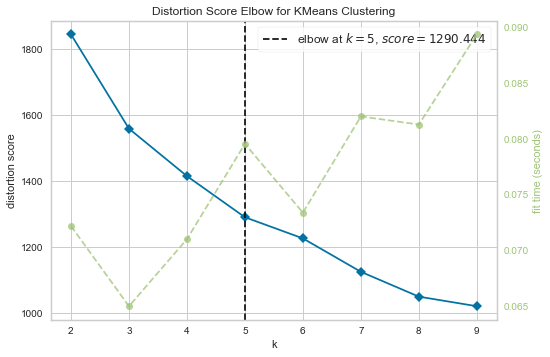

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
x1p=pd.DataFrame(x1p)
x1p.columns=['1','2','3','4','5','6','7','8','9']
# Showing elbow point
Elbow_M = KElbowVisualizer(km1_model, k=9)
Elbow_M.fit(x1p)
Elbow_M.show()

Based of the elbow calculations the ideal amount of clusters is 5.

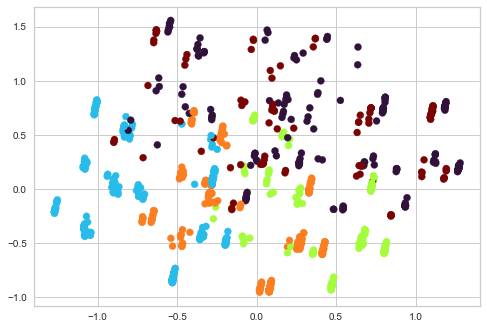

In [ ]:
# Defining new model
km1_model = KMeans(algorithm='elkan',n_clusters=5, random_state=32)

# fitting model
km1_model.fit(x1p)

# plotting model labels
plt.scatter(x1p['1'],x1p['2'],c=km1_model.labels_,cmap='turbo')
plt.show()

In [ ]:
# defining prediction data
y_pred=km1_model.labels_
y_pred_df=pd.DataFrame(y_pred)
y_pred_df=y_pred_df.reset_index(drop=True)

df1a=pd.concat([df1,y_pred_df],axis=1)
df1a.rename({0:'category'},axis=1,inplace=True)
df1a

,No,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,category
0,0,67,male,2,own,None,little,14494431,6,radio/TV,2
1,1,22,female,2,own,little,moderate,73786449,48,radio/TV,3
2,2,49,male,1,own,little,None,25988304,12,education,1
3,3,45,male,2,free,little,little,97728918,42,furniture/equipment,4
4,4,53,male,2,free,little,little,60383130,24,car,4
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,None,21524664,12,furniture/equipment,1
996,996,40,male,3,own,little,little,47822943,30,car,2
997,997,38,male,2,own,little,None,9968796,12,radio/TV,1
998,998,23,male,2,free,little,little,22876155,45,radio/TV,4


### Model Evaluation

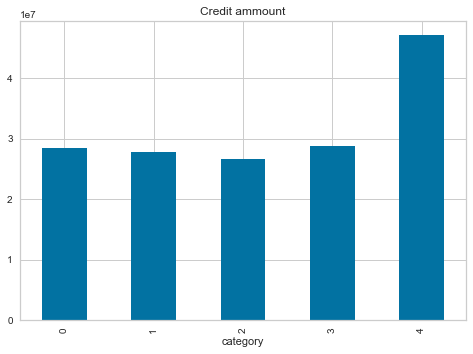

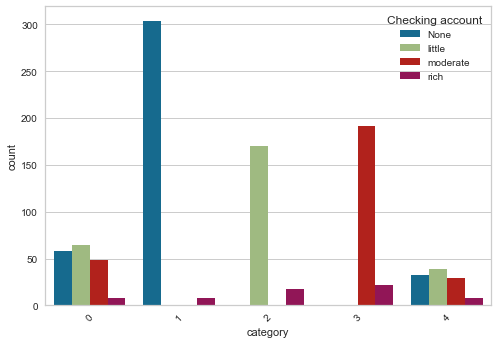

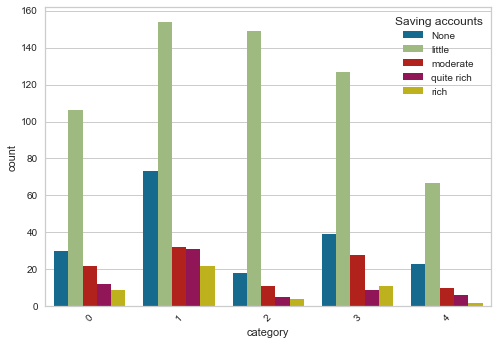

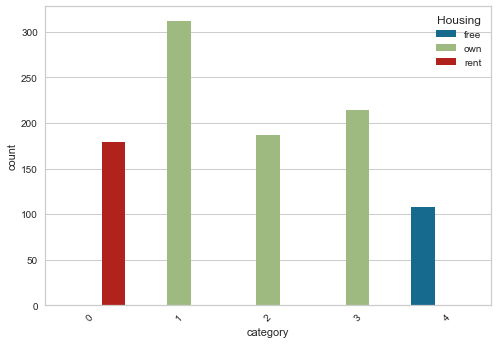

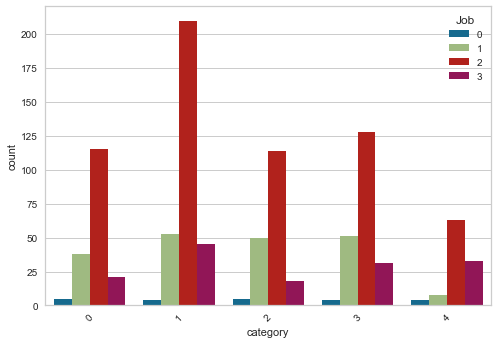

In [ ]:
# checking Credit amount by category
df1a.groupby('category')['Credit amount'].median().plot(kind='bar')
plt.title('Credit ammount')
plt.show()

# plotting checking account by category
plt.figure()
sns.countplot(x='category',data=df1a, hue='Checking account')
plt.xticks(rotation=45)
plt.show()

# plotting saving account by category
plt.figure()
sns.countplot(x='category',data=df1a, hue='Saving accounts')
plt.xticks(rotation=45)
plt.show()

# plotting checking account by category
plt.figure()
sns.countplot(x='category',data=df1a, hue='Housing')
plt.xticks(rotation=45)
plt.show()
# plotting job by category
plt.figure()
sns.countplot(x='category',data=df1a, hue='Job')
plt.xticks(rotation=45)
plt.show()

the model seems to have split the group based mostly on the Checking Account and housing with group 0 having rented housing, group 1 having no checking account and own housing, group 2 with little checking account and own housing. group 3 with moderate check and own housing. and group 4 with free housing. Comparing the graph of all category group we can see that group 4 have the highest median credit amount but shows no other notable differences. this group can be grouped as high risk users. due to the lack of target data and features that can be used to further analyze risk of credit user, all other categories will be grouped as low risk users.

In [ ]:
# defining categories
df1a.loc[df1a['category']==1,'category']='low risk'
df1a.loc[df1a['category']==0,'category']='Low risk'
df1a.loc[df1a['category']==2,'category']='Low risk'
df1a.loc[df1a['category']==3,'category']='Low risk'
df1a.loc[df1a['category']==4,'category']='high risk'
df1a

,No,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,category
0,0,67,male,2,own,None,little,14494431,6,radio/TV,Low risk
1,1,22,female,2,own,little,moderate,73786449,48,radio/TV,Low risk
2,2,49,male,1,own,little,None,25988304,12,education,High risk
3,3,45,male,2,free,little,little,97728918,42,furniture/equipment,4
4,4,53,male,2,free,little,little,60383130,24,car,4
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,None,21524664,12,furniture/equipment,High risk
996,996,40,male,3,own,little,little,47822943,30,car,Low risk
997,997,38,male,2,own,little,None,9968796,12,radio/TV,High risk
998,998,23,male,2,free,little,little,22876155,45,radio/TV,4


### Conclusion

